# Fill a color palette dynamically using Markov Chains
This notebook by designstripe allows anyone to upload a color palette database (in RGB format) to build a Markov model able to generate colors based on a given color. You can generate a palette of any size from a single or a handful of colors, taking advantage of this behavior.

## Imports

In [1]:
# Imports
import numpy as np
import random
import json
import difflib
from PIL import ImageColor
import matplotlib.pyplot as plt

In [ ]:
def rgb2hex(rgb) -> str:
    """
    :return: returns hex code with formatting #E4B3D1
    """
    return "#{:02x}{:02x}{:02x}".format(rgb[0], rgb[1], rgb[2]).upper()

In [15]:
# Fetch our color palette database demo
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DesignStripe/colab_notebooks/main/small_palette_database.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 56453  100 56453    0     0   260k      0 --:--:-- --:--:-- --:--:--  261k


## Dataset pre-processing

In [25]:
# Open the json file and read all palettes.
hex_palettes = []
with open("small_palette_database.json") as f:
  rgb_palettes = json.load(f)

In [ ]:
# Transfer rgb to hex
for palette in rgb_palettes:
  hex_palettes.append([rgb2hex(color) for color in palette])

In [28]:
# Transform to fit the Markov model input style
def clean_txt(txt):
  cleaned_txt = []
  for line in txt:
    words = [word for word in line]
    cleaned_txt+=words
  return cleaned_txt

cleaned_dataset = clean_txt(hex_palettes)
print("Number of colors in your dataset:", len(cleaned_dataset))
print("One color looks like this:",cleaned_dataset[10])

Number of colors in your dataset: 3465
One color looks like this: #0099E6


### Useful functions for the model

In [29]:
def make_markov_model(cleaned_dataset, n_gram=1):
  """
  :return: Return the markov model (dictionnary) built from the cleaned dataset
  """
  markov_model = {}
  for i in range(len(cleaned_dataset)-n_gram):
    curr_state, next_state = "", ""
    curr_state += cleaned_dataset[i] + " "
    next_state += cleaned_dataset[i+n_gram] + " "
    curr_state = curr_state[:-1]
    next_state = next_state[:-1]
    if curr_state not in markov_model:
      markov_model[curr_state] = {}
      markov_model[curr_state][next_state] = 1
    else:
      if next_state in markov_model[curr_state]:
        markov_model[curr_state][next_state] += 1
      else:
        markov_model[curr_state][next_state] = 1
  
  # calculating transition probabilities
  for curr_state, transition in markov_model.items():
    total = sum(transition.values())
    for state, count in transition.items():
      markov_model[curr_state][state] = count/total
      
  return markov_model

def display_palette(palette_to_display_hex, palette_length, title):
  """
  Display a given palette in hex codes with the appripriate title
  """
  palette_to_display_rgb = []
  for i in range(palette_length):
    if (palette_to_display_hex[i] == ''):
      palette_to_display_rgb.append((0,0,0))
    else:
      palette_to_display_rgb.append(ImageColor.getcolor(palette_to_display_hex[i], "RGB"))

  # Palette to generate
  palette_to_display_rgb = np.array(palette_to_display_rgb)
  plt.figure(figsize=(12,12))
  plt.imshow(palette_to_display_rgb[np.concatenate([[i] * 100 for i in range(len(palette_to_display_rgb))]).reshape((-1,10)).T])
  plt.title(title)
  plt.grid()
  plt.axis('off')
  plt.show()

### Build the model

In [31]:
# Build the model with our cleaned dataset 
markov_model = make_markov_model(cleaned_dataset)
print("Number of possible states (color transitions) in our model:", len(markov_model.keys()))

Number of possible states (color transitions) in our model: 3300


## Inference time!
### Let's generate a handful of new palettes from one color!

Let's say you want a palette with the image hex code: '#51386E', here's what you would do:

### Util function to generate a palette from an incomplete palette

In [33]:
def fill_my_palette(palette_to_fill_hex):
  """
  This function fills a palette and returns the new palette
  return: palette generated from the input palette in hex codes
  """
  # Calculate the number of colors to fill and prepare your variables
  palette_generated_hex = palette_to_fill_hex.copy()
  nb_colors_to_fill = np.where(np.array(palette_to_fill_hex) == '')[0].shape[0]
  palette_length = len(palette_to_fill_hex)

  # Fill in the missing colors
  for i in range(nb_colors_to_fill):
    i = i + (palette_length-nb_colors_to_fill)

    # Find the most probable next color with some variations
    top_3_closest_colors = difflib.get_close_matches(palette_generated_hex[i-1],markov_model.keys())
    next_color = list(markov_model[top_3_closest_colors[random.randint(0,2)]].keys())[0]
    palette_generated_hex[i] = next_color

  return palette_generated_hex, palette_length

### Generate our palettes!


Generation #1:


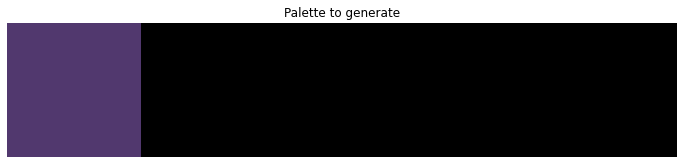

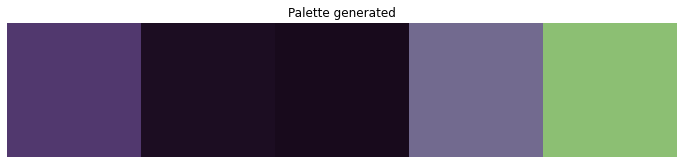


Generation #2:


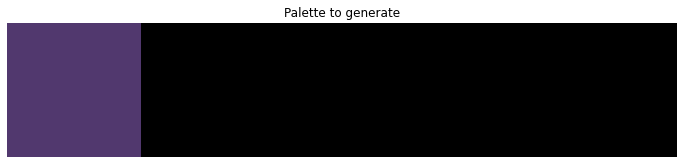

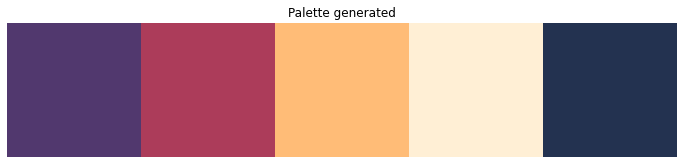


Generation #3:


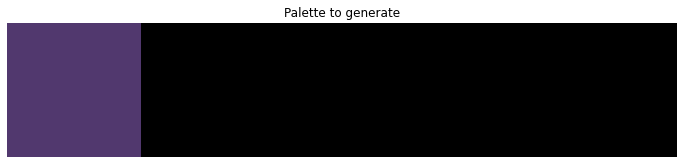

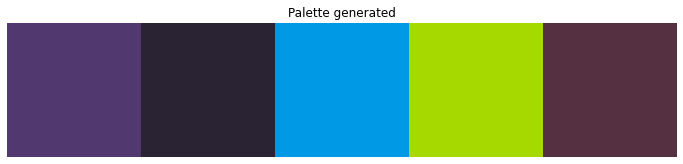


Generation #4:


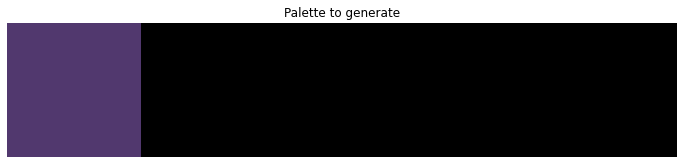

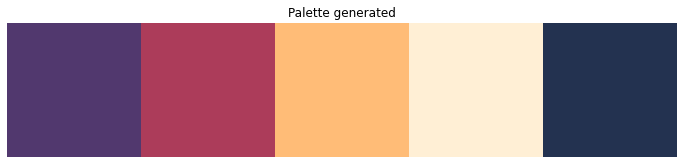


Generation #5:


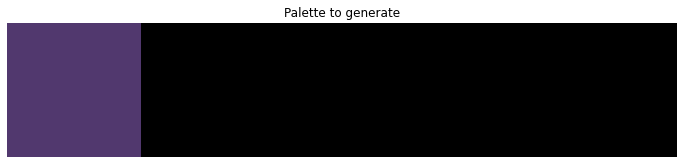

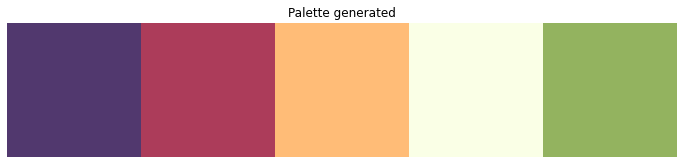

In [38]:
palette_to_fill_hex = ['#51386E','','','','']

# Generate and display 5 possible palettes
for i in range(5):
  # Generate our palette
  palette_generated_hex, palette_length = fill_my_palette(palette_to_fill_hex)

  # Display our initial and generated palettes
  print("\nGeneration #%i:" %(i+1))
  display_palette(palette_to_fill_hex, palette_length, "Palette to generate")
  display_palette(palette_generated_hex, palette_length, "Palette generated")

## Play with the code!

I hope you enjoyed this quick Markov chain model (or dictionary search in other words), allowing you to generate a complete palette based on the previous color. 

Feel free to change the code and improve it, use your own dataset, or even use another model to compare the results! Play with it and have fun. Let us know what you create at louis@designstripe.com. We would love to exchange with you!

Try another model or technique with our demo dataset using `rgb_palettes` or `hex_palettes` we created earlier!

In [41]:
# Start coding now:




